## Manual Regularization

In [1]:
import pandas as pd
df=pd.read_csv('CarPrice_Assignment.csv')


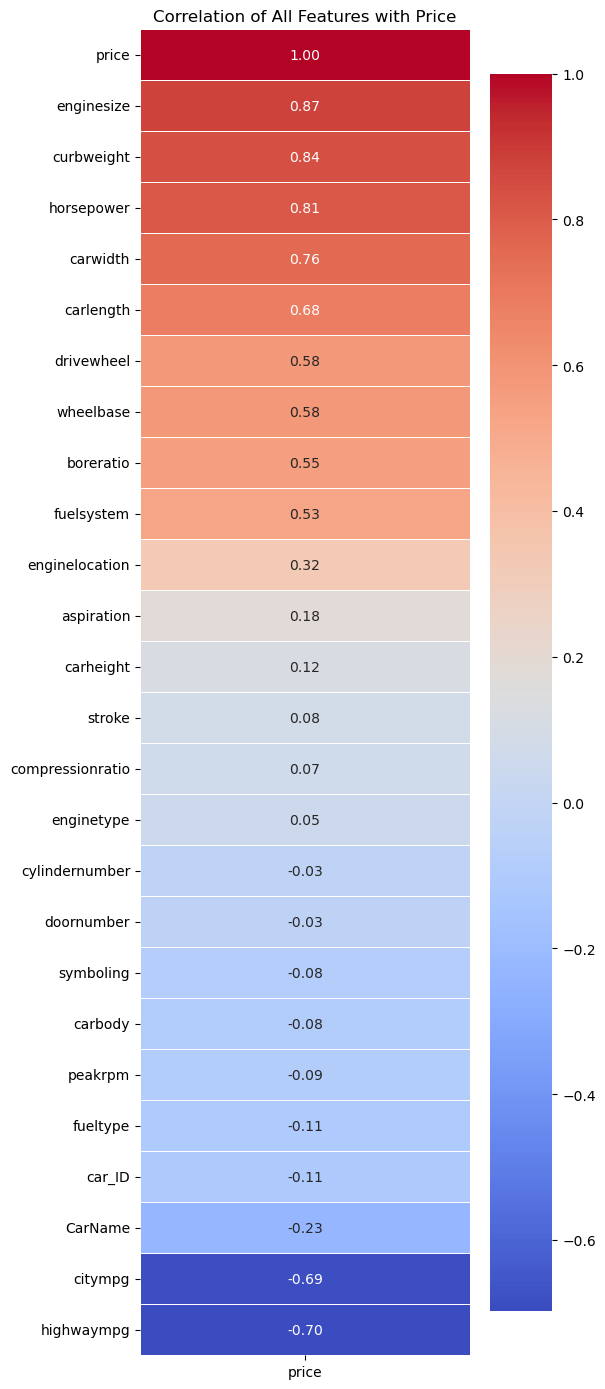

In [2]:
## Feature to target relationship 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# encode all categorical columns
df_enc = df.copy()
le = LabelEncoder()
for c in df_enc.columns:
    if df_enc[c].dtype == 'object':
        df_enc[c] = le.fit_transform(df_enc[c])

# correlation of all features with price
price_corr = df_enc.corr()[['price']].sort_values(by='price', ascending=False)

# heatmap
plt.figure(figsize=(6, 14))
sns.heatmap(price_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of All Features with Price")
plt.tight_layout()
plt.show()


### Realtion with price(target)

highwaympg->strongly negative(-0.70)

citympg->strongly negative(-0.69)

carname->moderately negative(-0.23)

car_id->weakly negative(-0.11)

fueltype->weakly negative(-0.11)

peakrpm->weakly negative(-0.09)

carbody->weakly negative(-0.08)

symboling->weakly negative(-0.08)

doornumber->weakly negative(-0.03)

cylindernumber->weakly negative(-0.03)

enginetype->weakly positive(0.05)

compressionratio->weakly positive(0.07)

stroke->weakly positive(0.08)

carheight->weakly positive(0.12)

aspiration->weakly positive(0.18)

enginelocation->moderately positive(0.32)

fueltype->moderately positive(0.53)

boreratio->moderately positive(0.55)

wheelbase->moderately positive(0.58)

drivewheel->moderately positive(0.58)

carlength->moderately positive(0.68)

carwidth->strongly positive(0.76)

horsepower->strongly positive(0.81)

curbweight->strongly positive(0.84)

enginesize->strongly positive(0.87)

weakly negative:peakrpm,carbody,symboling,doornumber,cylindernumber

weakly positive:enginetype,compressionratio,stroke

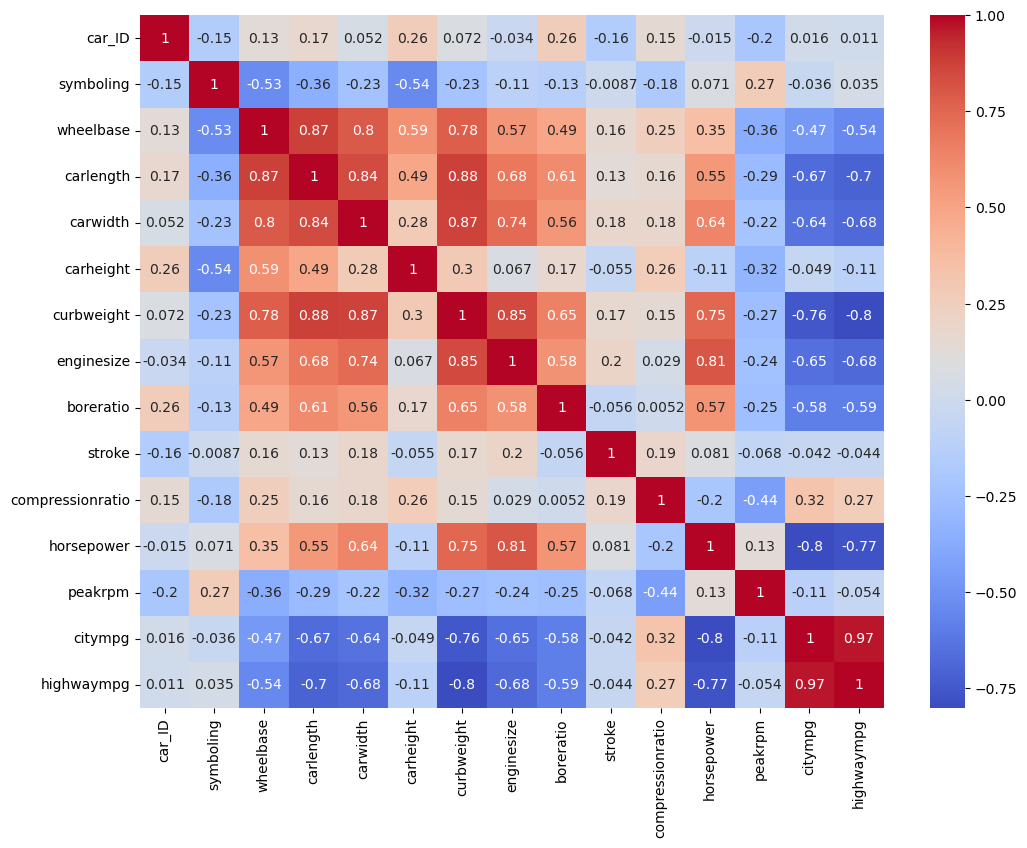

In [8]:
## Analysing feature to feature realtionship

x=df.drop('price',axis=1)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

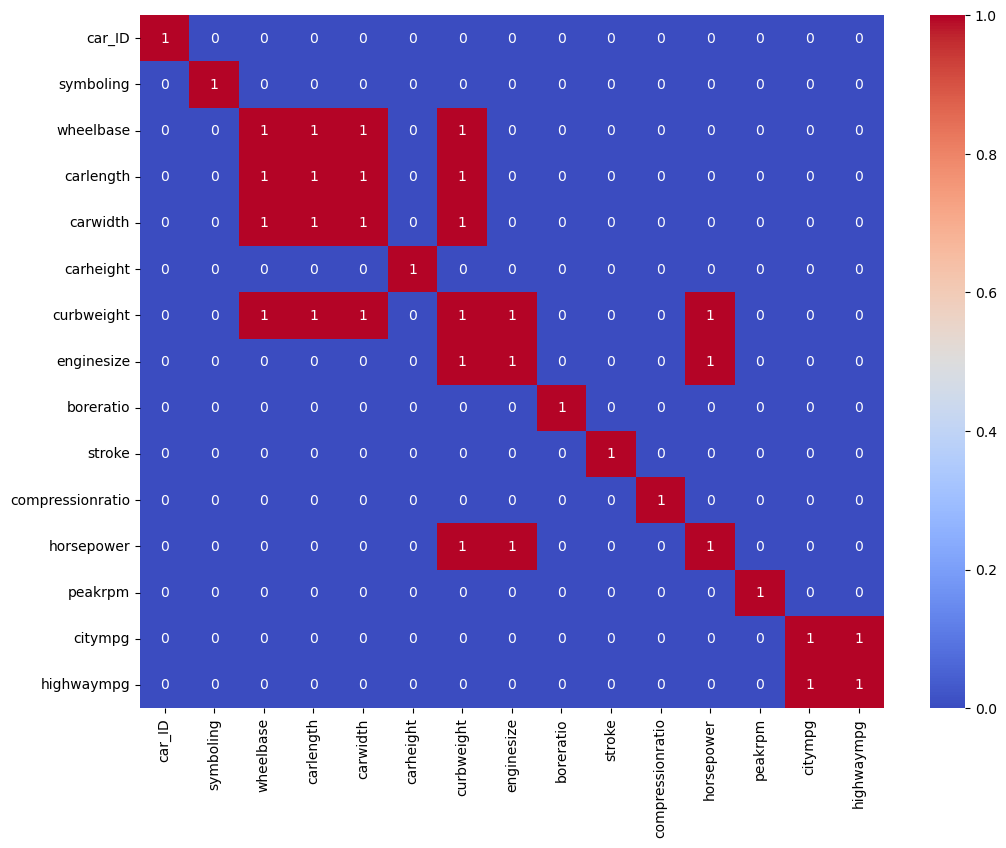

In [10]:
## Multicollinearity

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True)>0.75, annot=True,cmap='coolwarm')
plt.show()

## Muticollinearity between features

wheelbase-->carlength(0.87)

wheelbase-->carwidth(0.8)

wheelbase-->curbweight(0.78)

carlength-->carwidth(0.84)

carlength-->curbweight(0.88)

carwidth-->curbweight(0.87)

curbweight-->enginesize(0.85)

curbweight-->horsepower(0.75)

enginesize-->horsepower(0.81)

citympg-->highwaympg(0.97)

In [16]:
### Remove features that have high multicollinearity and has less correlation with target to remove noise and columns with less correlation with price.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


# copy dataframe
df_model = df.copy()

# encode categorical columns
le = LabelEncoder()
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        df_model[col] = le.fit_transform(df_model[col])

# drop specified columns
df_model.drop(
    columns=['doornumber', 'cylindernumber', 'enginetype', 'compressionratio', 'wheelbase'],
    inplace=True
)

# split features and target
X = df_model.drop('price', axis=1)
y = df_model['price']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# scores
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Train R² Score:", train_score)
print("Test R² Score:", test_score)




Train R² Score: 0.9036161653130529
Test R² Score: 0.8635871948799018


## RIDGE AND LASSO REGRESSIONS

In [ ]:
from sklearn.model_selection import train_test_split
X=df[['enginesize']]
y=df['price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [36]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

print("Ridge Regression")

alphas = np.arange(0.1, 10, 0.05)

ridge = RidgeCV(alphas=alphas)
ridge.fit(X_train, y_train)

print("Best alpha:", ridge.alpha_)

y_pred = ridge.predict(X_test)

train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)

print("Training score (R²):", train_score)
print("Testing score (R²):", test_score)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


Ridge Regression
Best alpha: 9.950000000000003
Training score (R²): 0.7507055051151215
Testing score (R²): 0.8040933847321539
MSE: 15465655.926167909


In [42]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

print("Lasso Regression")

alphas = np.arange(0.1, 10, 0.05)

lasso = LassoCV(alphas=alphas)

lasso.fit(X_train, y_train)

print("Best alpha:", lasso.alpha_)

y_pred = lasso.predict(X_test)

train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)

print("Training score (R²):", train_score)
print("Testing score (R²):", test_score)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


Lasso Regression
Best alpha: 9.950000000000003
Training score (R²): 0.7507055051381136
Testing score (R²): 0.8040934124003777
MSE: 15465653.74192707
